In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image
from scipy.misc import imread
%matplotlib inline

# Simple K-Means

In [2]:
data = np.random.normal([3, 3], [4, 9], size=(40, 2))
# data1 = np.random.normal([0, 3], [1, 1], size=(10, 2))
# data2 = np.random.normal([3, 0], [1, 1], size=(10, 2))
# data3 = np.random.normal([-3, 0], [1, 1], size=(10, 2))
# data4 = np.random.normal([0, -3], [1, 1], size=(10, 2))
# data = np.vstack((np.vstack((np.vstack((data1, data2)), data3)), data4))

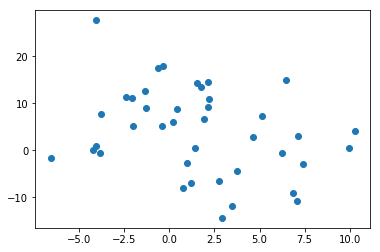

In [3]:
plt.scatter(x=data[:,0], y=data[:,1])

In [4]:
k = 4
colors = ['red', 'green', 'blue', 'orange']

In [5]:
k_data = defaultdict(list)
for point in data:
    i = np.random.randint(0, k)
    k_data[i].append(point)
for i in k_data:
    k_data[i] = np.array(k_data[i])

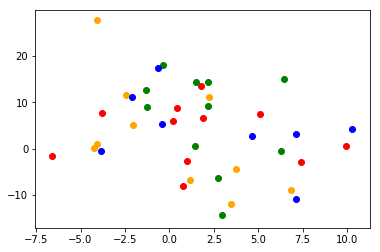

In [6]:
for i in k_data:
    plt.scatter(x=k_data[i][:,0], y=k_data[i][:,1], c=colors[i])

In [7]:
k_means = np.array([k_data[i].mean(axis=0) for i in k_data])

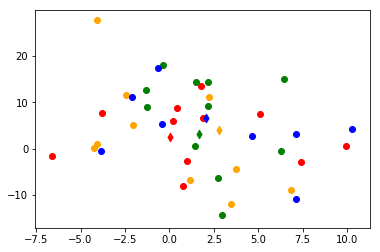

In [8]:
for i in k_data:
    plt.scatter(x=k_data[i][:,0], y=k_data[i][:,1], c=colors[i])
    plt.scatter(x=k_means[i][0], y=k_means[i][1], marker='d', c=colors[i])

In [9]:
def get_k_data(k_means):
    k_data = defaultdict(lambda: [])
    for point in data:
        i = np.argmin([np.linalg.norm(point - k_mean) for k_mean in k_means])
        k_data[i].append(point)
    for i in k_data:
        k_data[i] = np.array(k_data[i])
    return k_data

In [10]:
def get_k_means(k_data):
    return np.array([k_data[i].mean(axis=0) for i in k_data])

In [11]:
def plot(k_data, k_means):
    for i in k_data:
        plt.scatter(x=k_data[i][:,0], y=k_data[i][:,1], c=colors[i])
        plt.scatter(x=k_means[i][0], y=k_means[i][1], marker='d', c=colors[i])

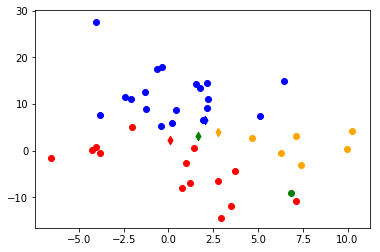

In [12]:
k_data = get_k_data(k_means)
plot(k_data, k_means)

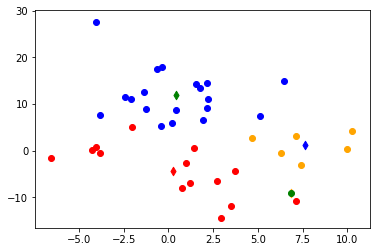

In [13]:
k_means = get_k_means(k_data)
plot(k_data, k_means)

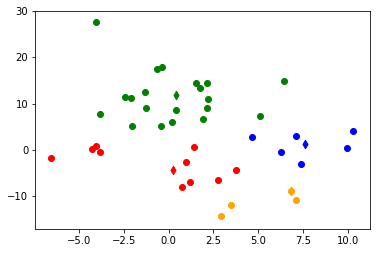

In [14]:
k_data = get_k_data(k_means)
plot(k_data, k_means)

In [15]:
for i in range(500):
    k_means = get_k_means(k_data)
    k_data = get_k_data(k_means)

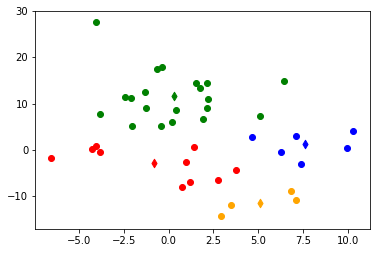

In [16]:
plot(k_data, k_means)

# Image Clustering

In [17]:
image_data = imread("flowers.jpg")

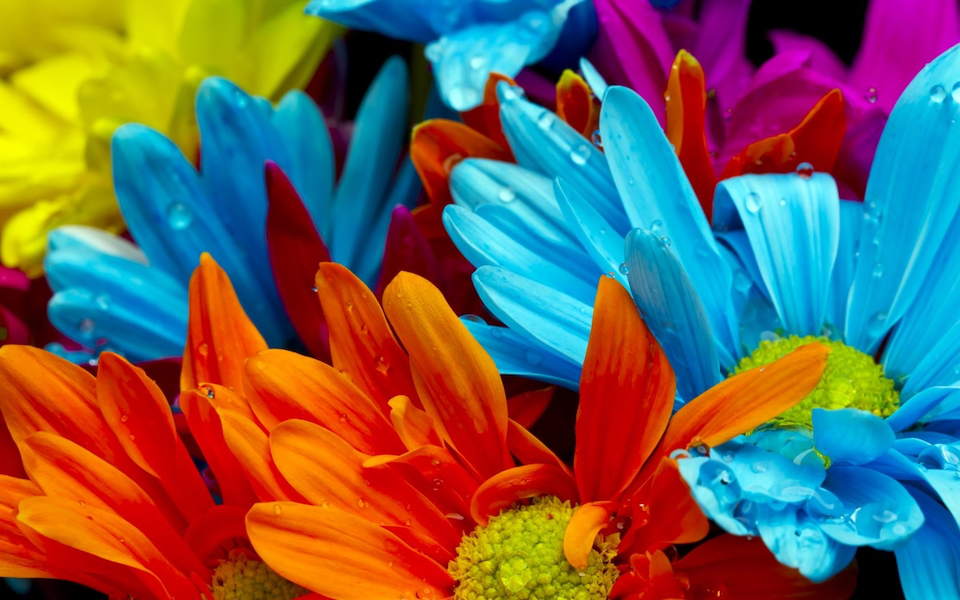

In [18]:
Image.fromarray(image_data, 'RGB')

In [19]:
k = 10

In [20]:
pixel_clusters = np.random.randint(0, high=k, size=(image_data.shape[0], image_data.shape[1]))

In [21]:
cluster_centers = np.array([image_data[pixel_clusters == i].mean(axis=0) for i in range(k)])

In [24]:
for i in range(image_data.shape[0]):
    for j in range(image_data.shape[1]):
        pixel_clusters[i][j] = np.argmin(np.linalg.norm(cluster_centers - image_data[i][j],axis=1))

In [25]:
for z in range(5):
    for i in range(k):
        data_points = image_data[pixel_clusters == i]
        cluster_centers[i] = data_points.mean(axis=0) if data_points.size > 0 else np.random.rand(3) * 255
    for i in range(image_data.shape[0]):
        for j in range(image_data.shape[1]):
            pixel_clusters[i][j] = np.argmin(np.linalg.norm(cluster_centers - image_data[i][j], axis=1))

In [26]:
output_image = np.zeros(image_data.shape)
for i in range(output_image.shape[0]):
    for j in range(output_image.shape[1]):
        output_image[i][j] = cluster_centers[pixel_clusters[i][j]]

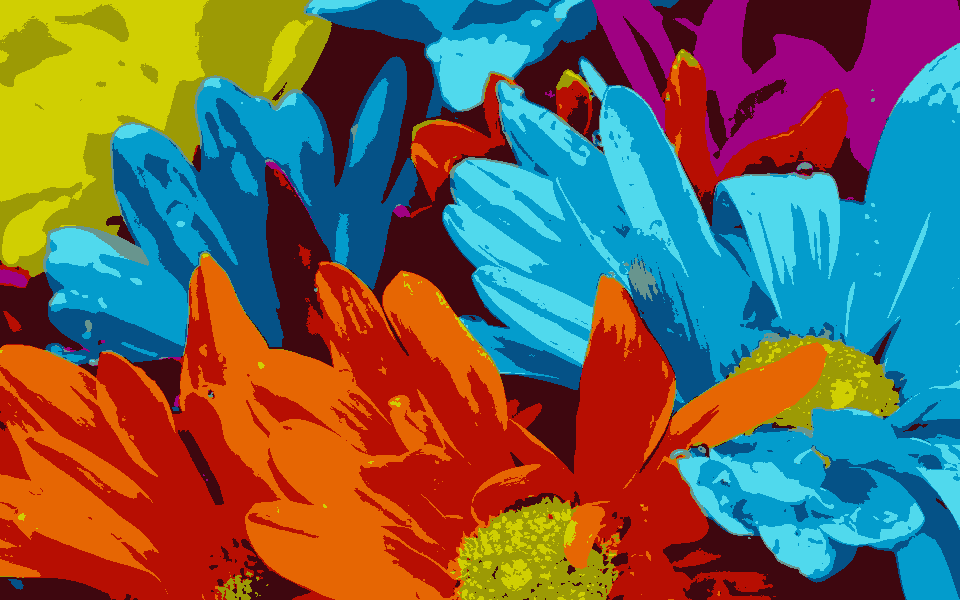

In [27]:
Image.fromarray(output_image.astype('uint8'), 'RGB')